In [124]:
#Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SCALE_FACTOR = 0.4
projected = lambda x,m: x + OFFSET if x < m else x - OFFSET

def scale(x,y,centre):
    x_mid,y_mid = centre
    x -= x_mid
    y -= y_mid
    x *= SCALE_FACTOR
    y *= SCALE_FACTOR
    x += x_mid
    y += y_mid
    return (x,y)

def getCentre(vertices):
    x_max = max([x for x,_ in vertices])
    x_min = min([x for x,_ in vertices])
    y_max = max([y for _,y in vertices])
    y_min = min([y for _,y in vertices])
    x_mid = int((x_max + x_min)/2)
    y_mid = int((y_max + y_min)/2)
    return (x_mid,y_mid)
    
"""
Create a web by traversing the vertices from a z of 0 to Z back and
forth.
"""
def create3DVertices(vertices):
    centre = getCentre(vertices)
    Z = 60
    d_vs = []
    # Each pass draws a 'rectangle' between the two z co-ordinates using
    # adjacent pairs of x and y co-ordinates.
    for i in range(0,len(vertices)-1):
        x1,y1 = vertices[i]
        d_vs += [(x1,y1,0)]  # front side
        # Scale down the shape on the opposite side
        sx,sy = scale(x1,y1,centre)
        d_vs += [(sx,sy,Z)] # front side

        x2,y2 = vertices[i+1]
        # Scale down the shape on the opposite side
        sx,sy = scale(x2,y2,centre)
        d_vs += [(sx,sy,Z)] 
        d_vs += [(x2,y2,0)] # opposite side
        d_vs += [(x1,y1,0)] # front side
        d_vs += [(x2,y2,0)] # opposite side

    # invert the y values so right side up
    max_y = max([y for _,y,_ in d_vs])
    y = np.array([max_y - y for _,y,_ in d_vs])
    x = np.array([[x for x,y,z in d_vs]])
    z = np.array([[z for x,y,z in d_vs]])

    return(x,y,z)

def create2DVertices(vertices):
    # invert the y values so right side up
    max_y = max([y for _,y in vertices])
    y = np.array([max_y - y for _,y in vertices])
    x = np.array([[x for x,_ in vertices]])
    z = np.zeros((2,len(vertices)))

    return(x,y,z)

def makeFullGraph(x, y, z, filename, titlename=""):
    #Change the Size of Graph using Figsize
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')
    plt.rcParams['grid.color'] = "navy"
    ax.plot_wireframe(x, y, z, color ='blue')
    ax.view_init(azim=135,elev=20,vertical_axis="y")
    ax.xaxis.set_pane_color("black")
    ax.yaxis.set_pane_color("black")
    ax.zaxis.set_pane_color("black")
    if titlename:
        plt.title(titlename,y=1,fontsize = 30)
    plt.savefig(filename, transparent=True,bbox_inches='tight')
    return



### Read in all the webs from a cleaned up copy of the data structures

/tmp/ipykernel_3411516/2800908554.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(7,7))


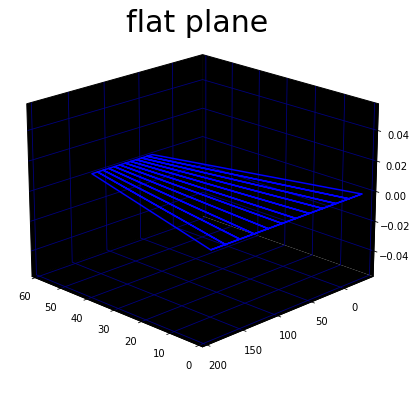

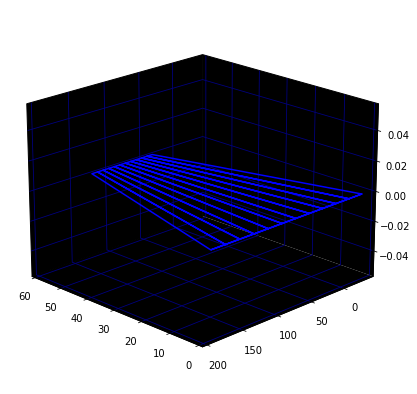

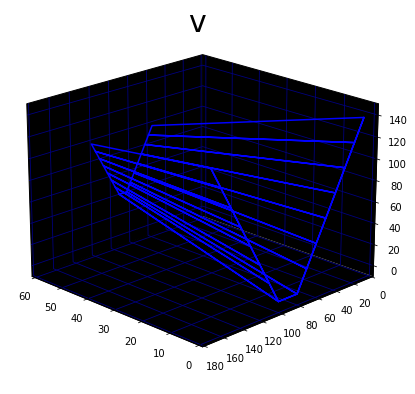

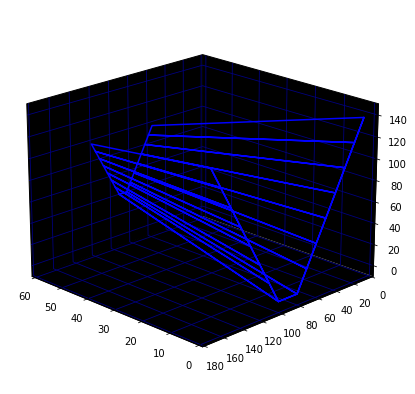

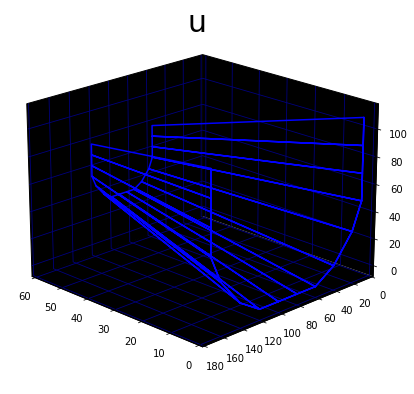

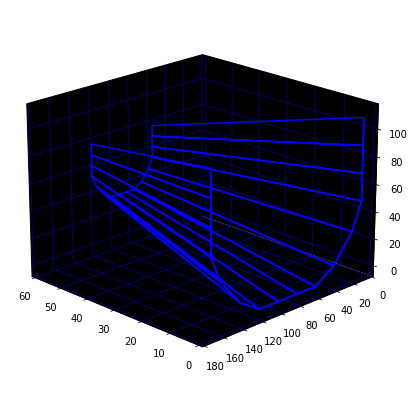

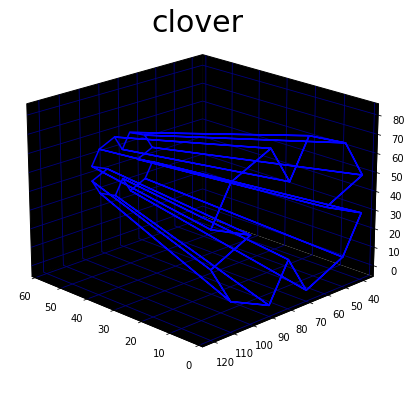

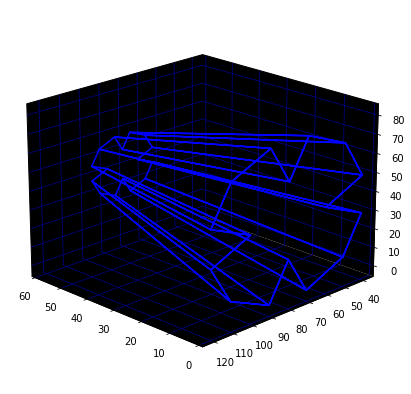

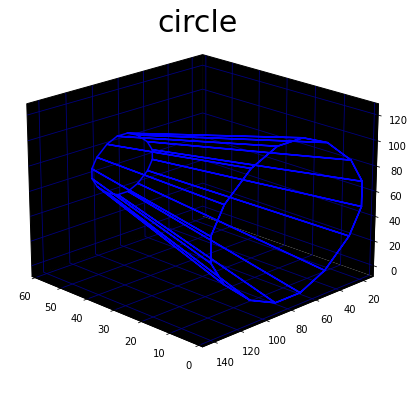

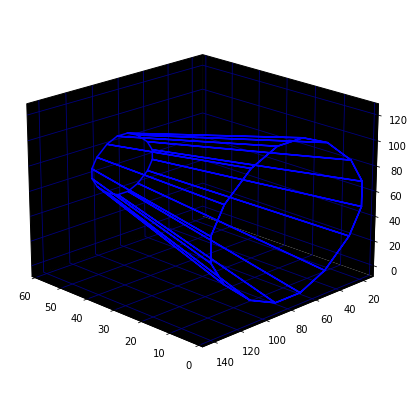

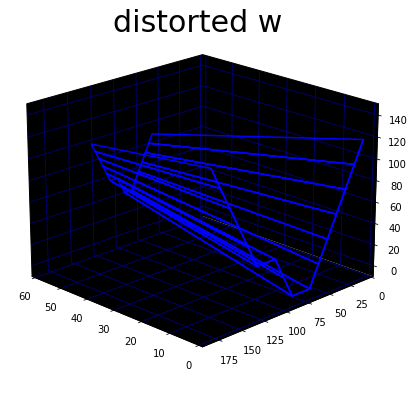

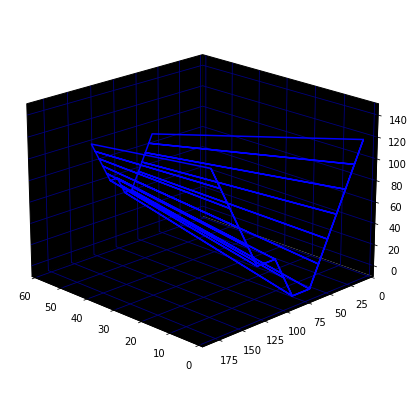

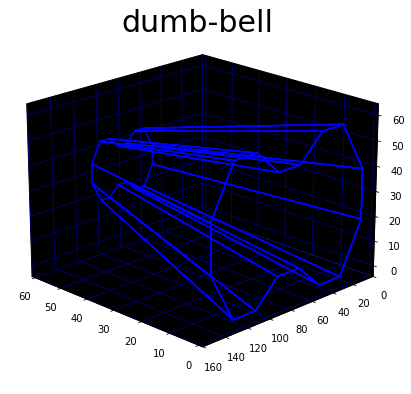

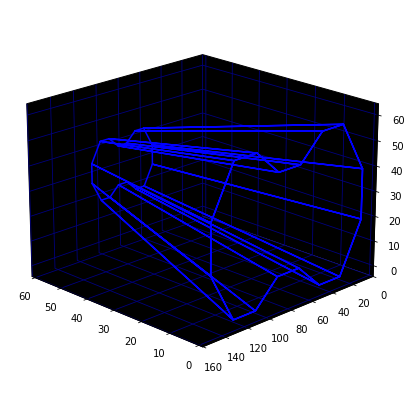

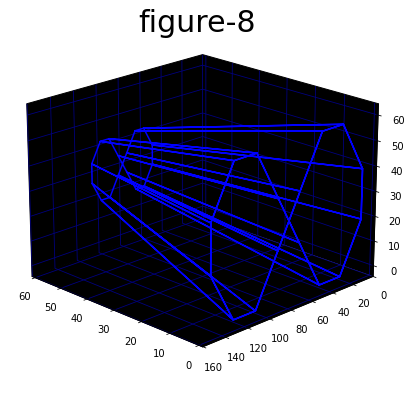

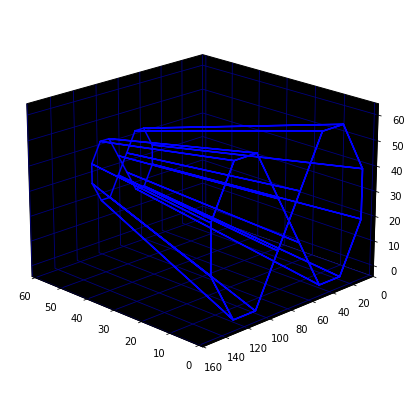

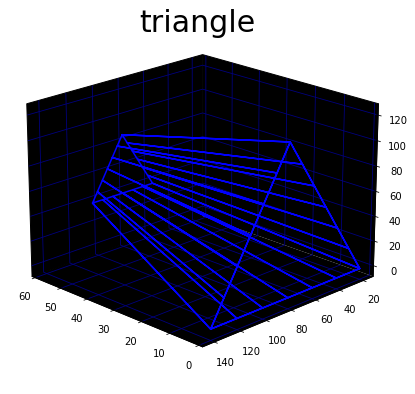

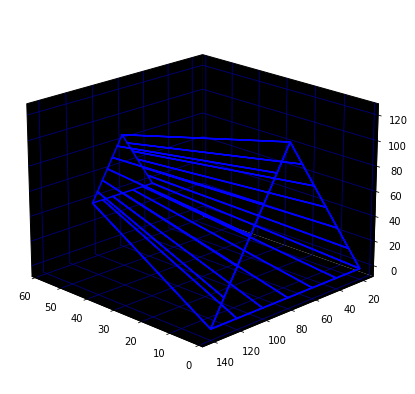

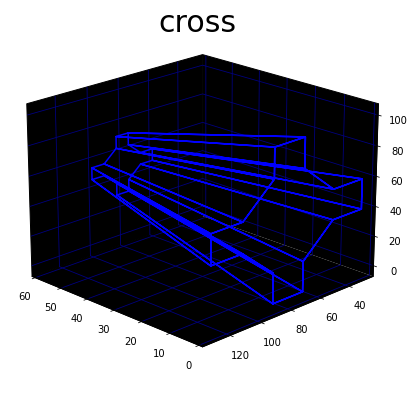

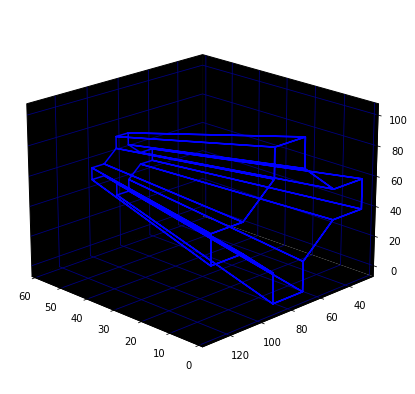

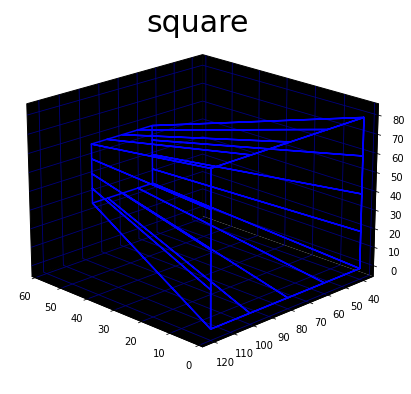

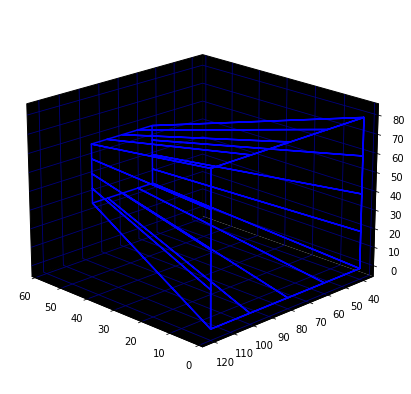

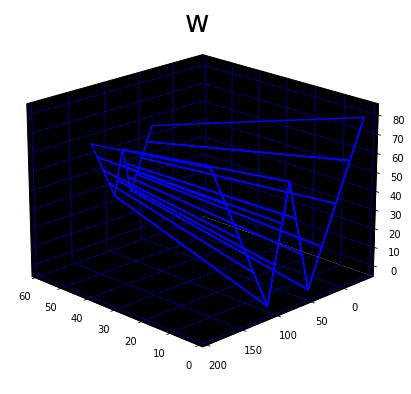

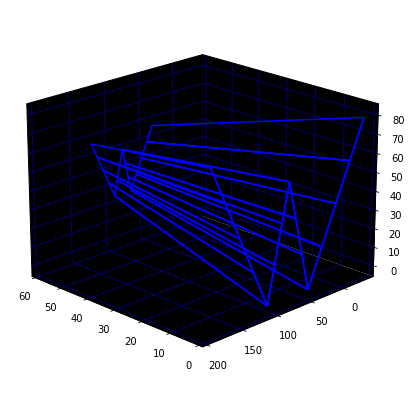

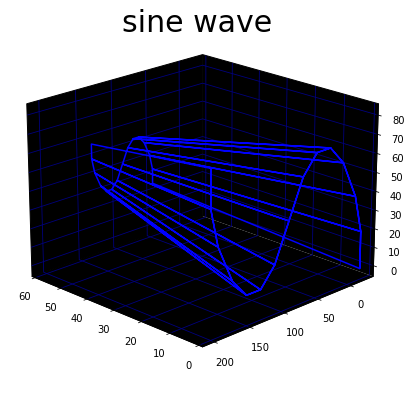

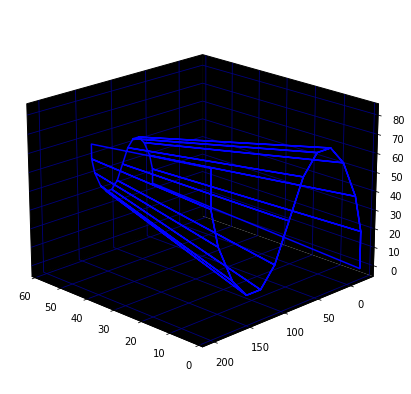

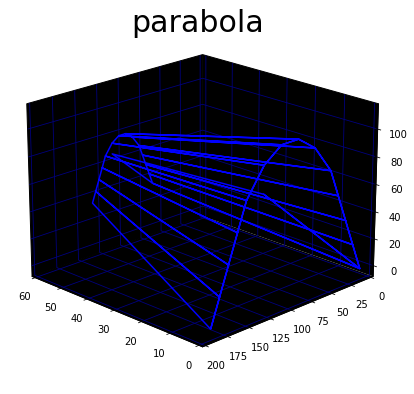

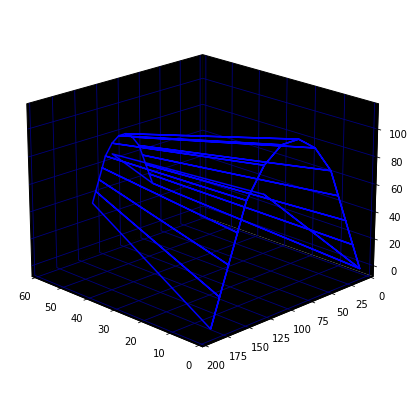

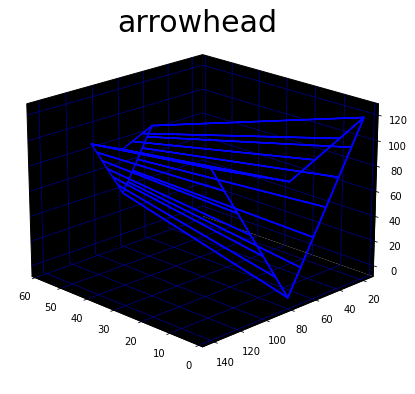

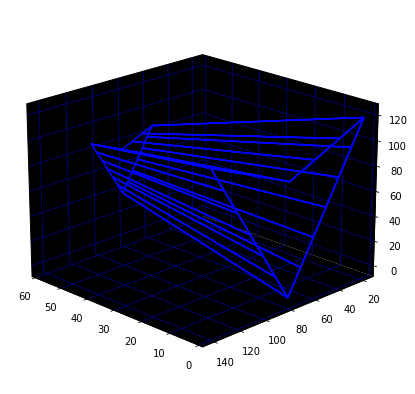

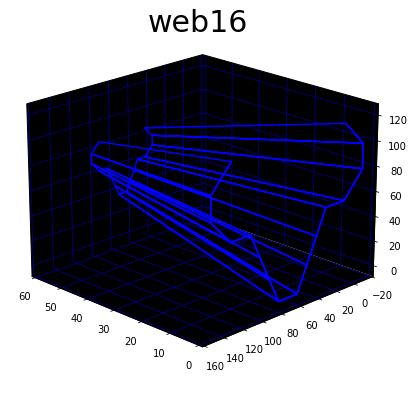

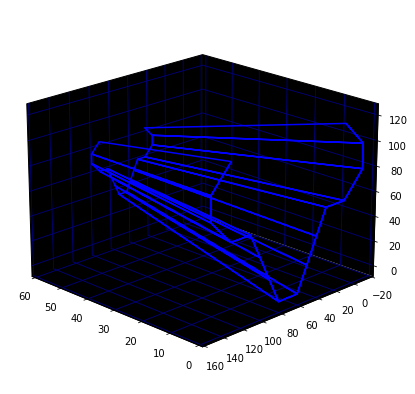

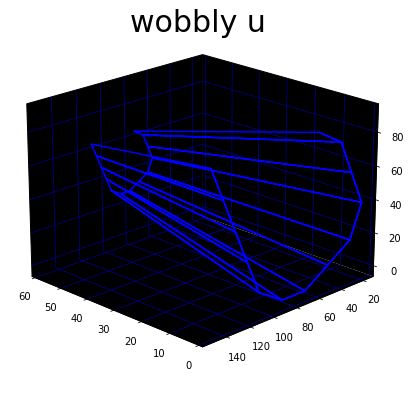

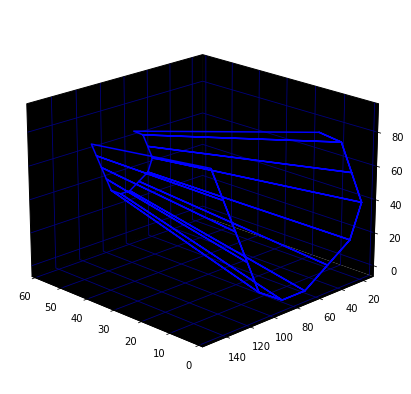

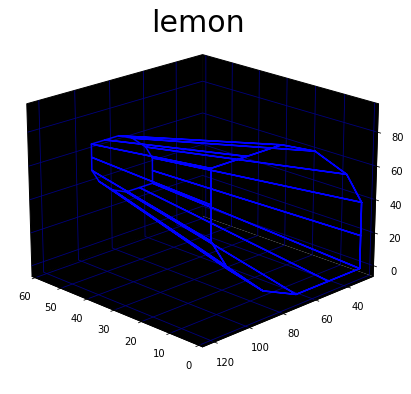

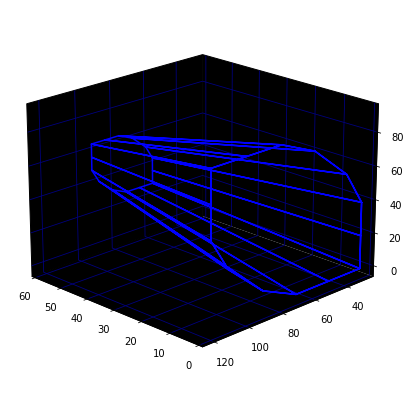

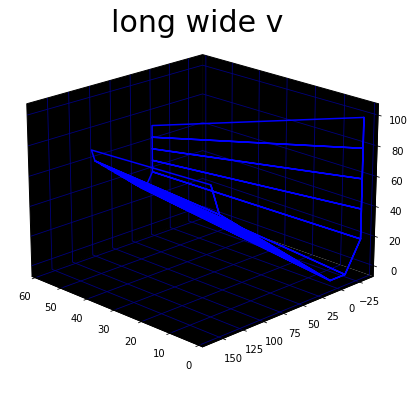

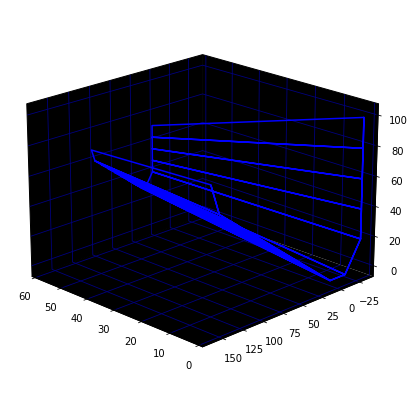

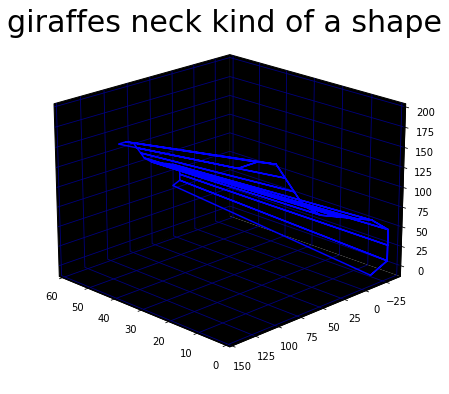

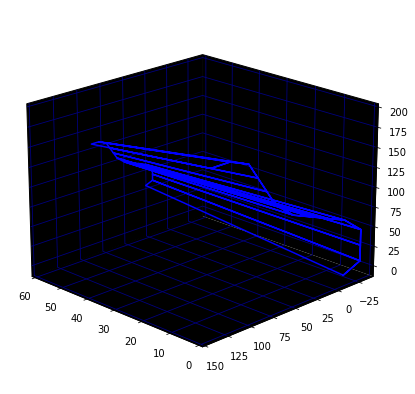

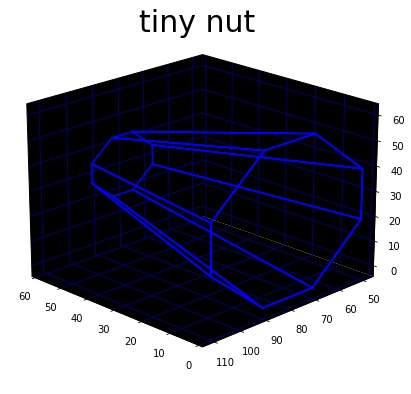

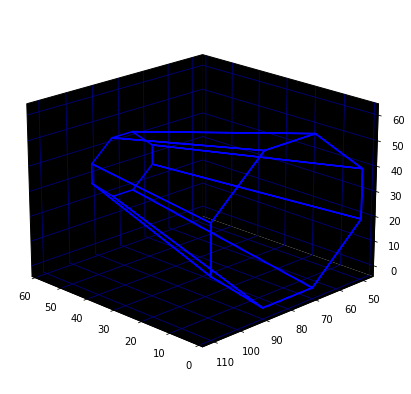

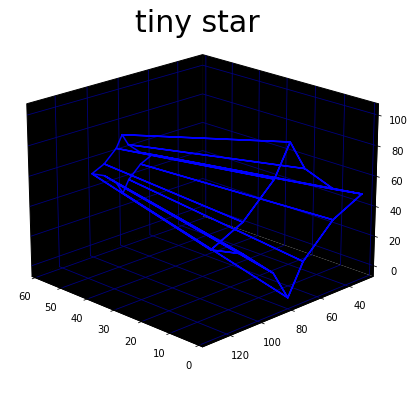

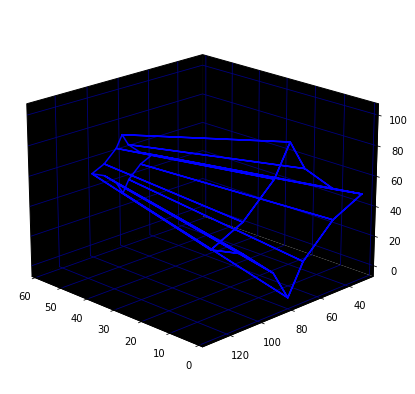

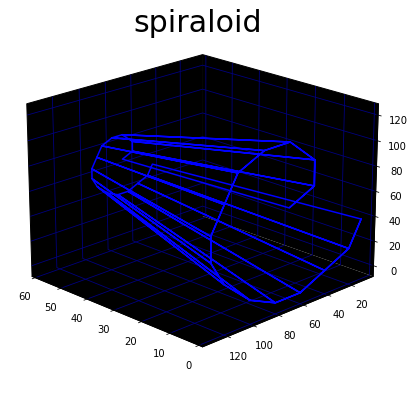

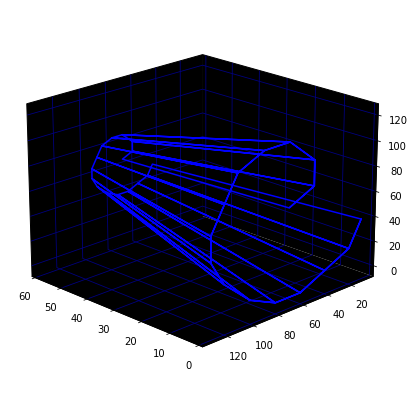

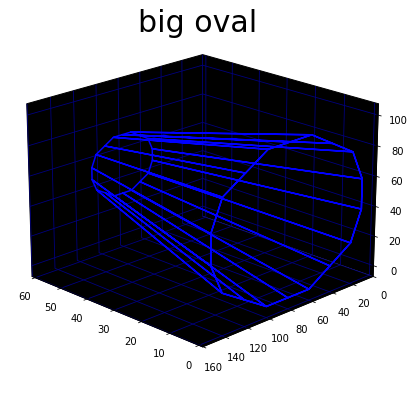

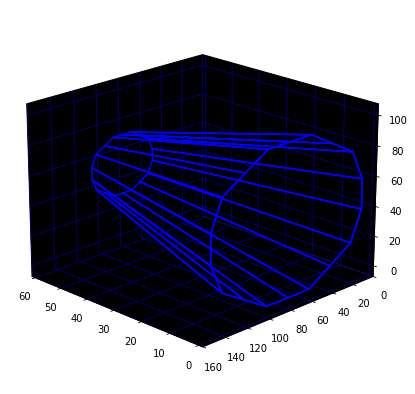

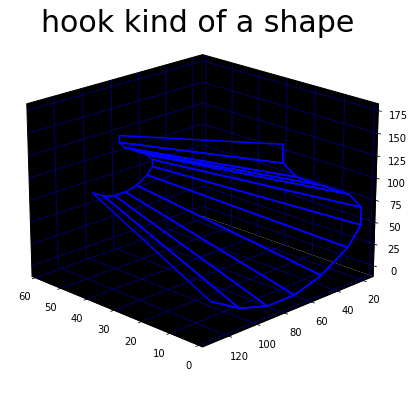

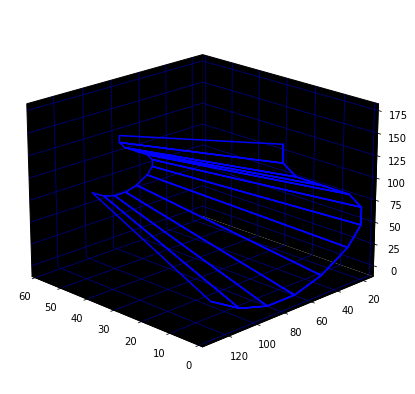

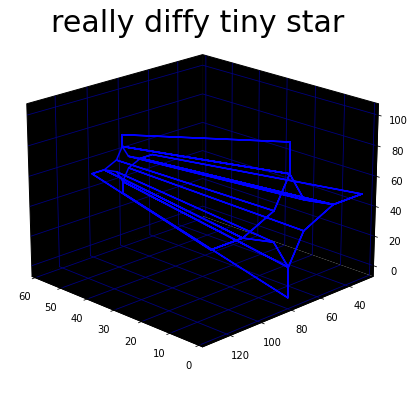

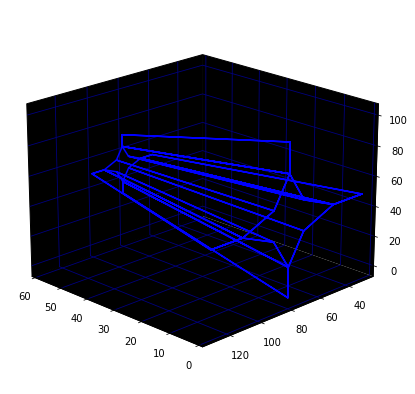

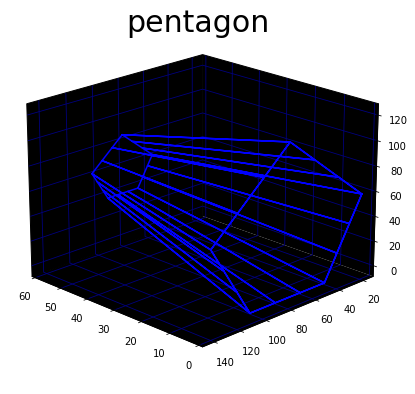

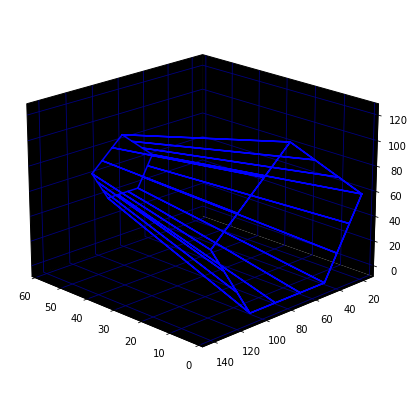

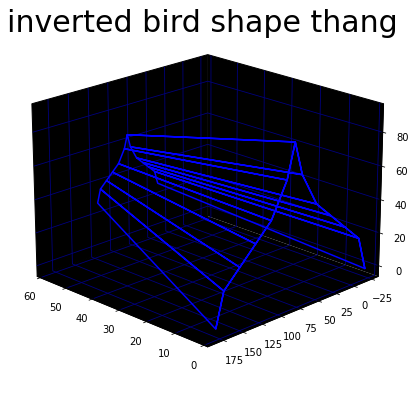

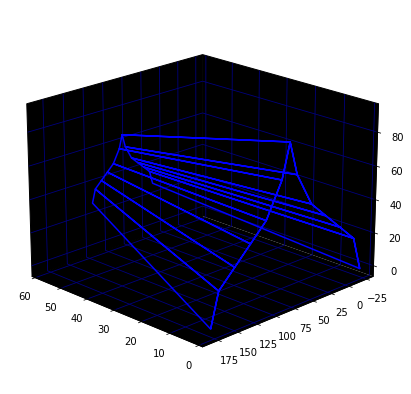

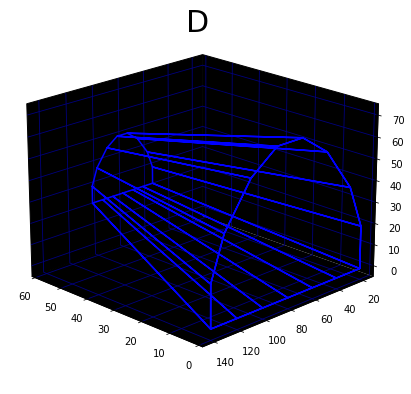

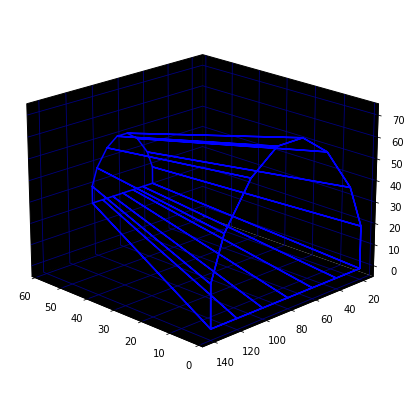

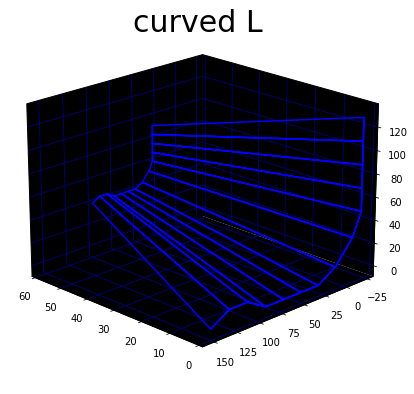

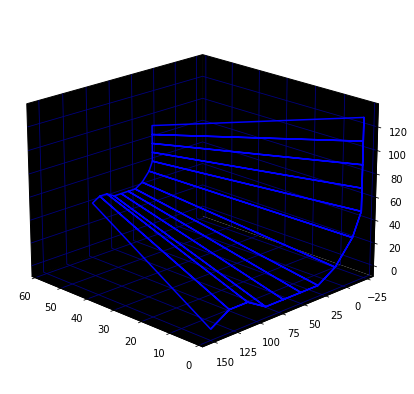

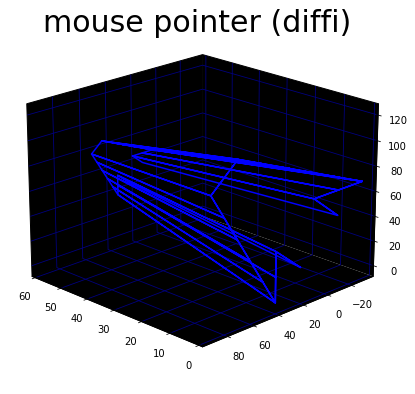

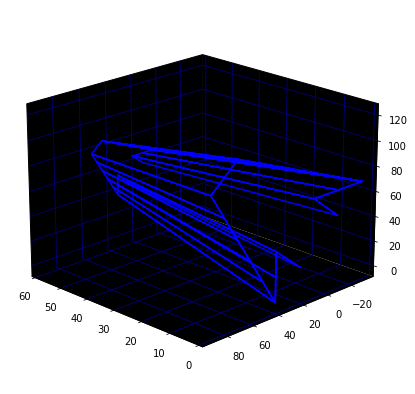

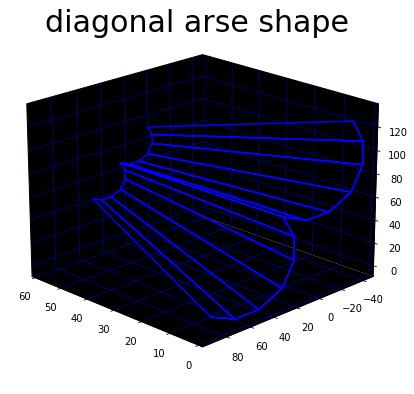

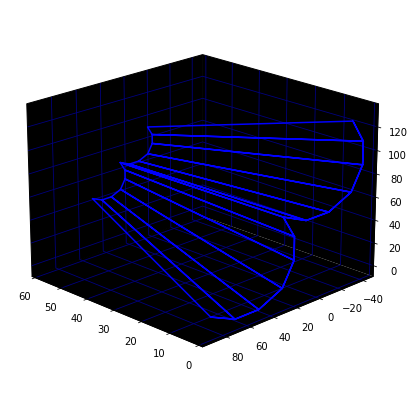

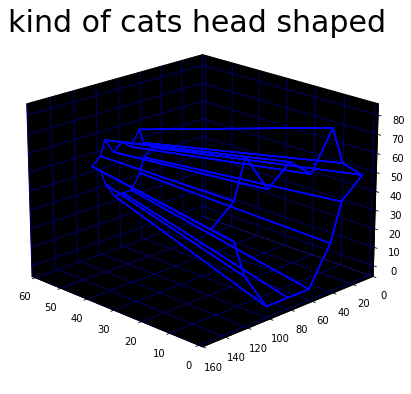

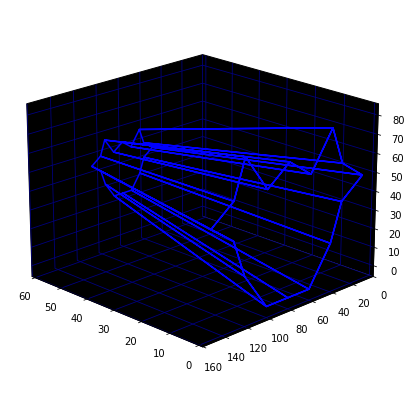

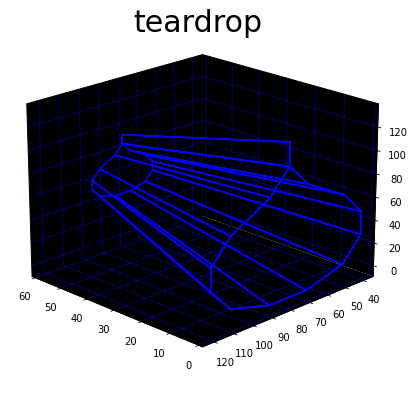

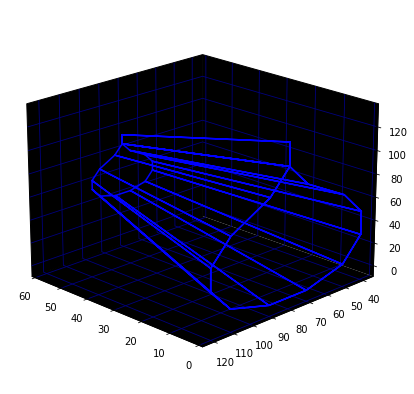

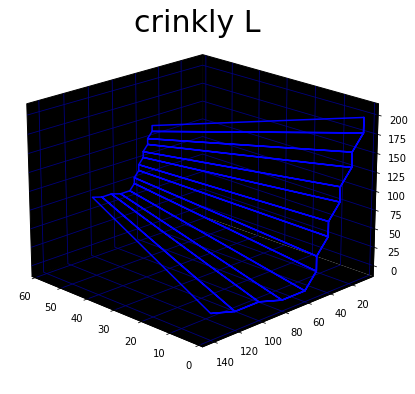

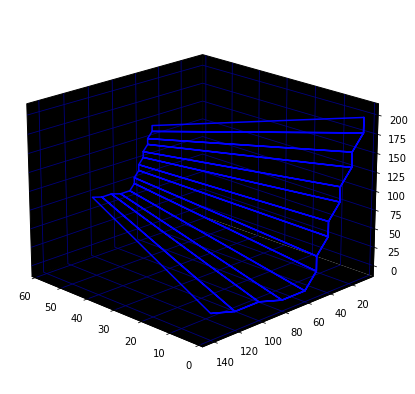

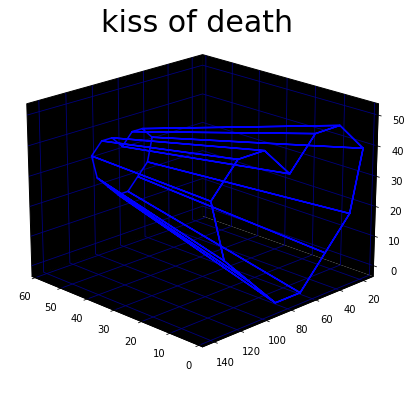

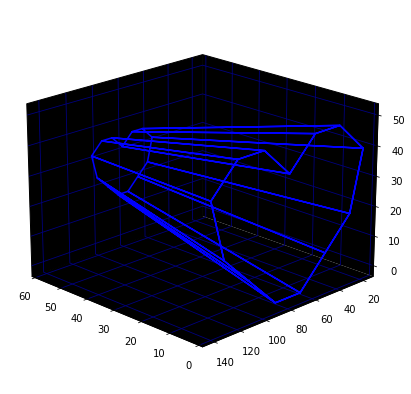

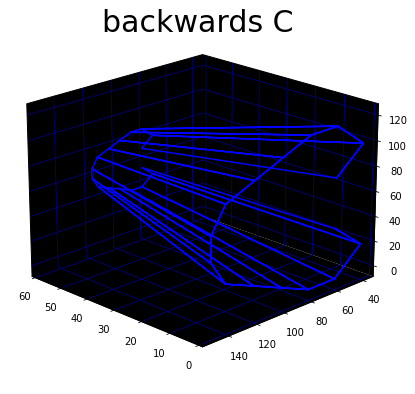

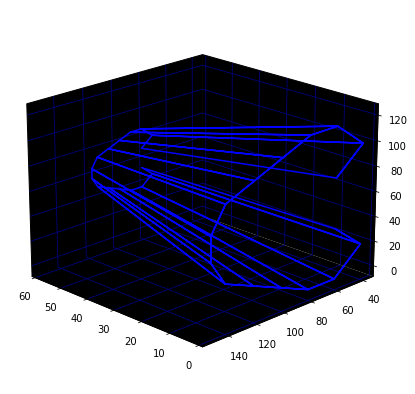

In [126]:
lines = open("webs.s",'r').readlines()

def writeWeb(web_data, web_name):
    xs = [int(x) for x in ','.join([x for x in web_data.split() if ',' in x]).split(',')]
    l = [x*10 for x in xs]
    vertices = [(l[i],l[i+1]) for i in range(0,len(l)-1,2)]
    # if the last value is 0 we ignore the last vertex pair
    if not xs[-1]:
        vertices = vertices[:-1]
    #print(web_data,l,vertices)
    x,y,z = create3DVertices(vertices)
    makeFullGraph(x,y,z, f"webs/{web_name.replace(' ','_')}.png", web_name)
    makeFullGraph(x,y,z, f"webs/{web_name.replace(' ','_')}_no_title.png", "")
    return

web_name = ""
web_data = ""
for ln in lines:
    if ":" in ln and web_name:
        writeWeb(web_data, web_name)
        web_data = ""
        web_name = ""
    if ";" in ln:
        web_name = ln.split(';')[-1].strip()
    if ":" in ln:
        continue
    web_data += ln
writeWeb(web_data, web_name)

    

## Scratchpad

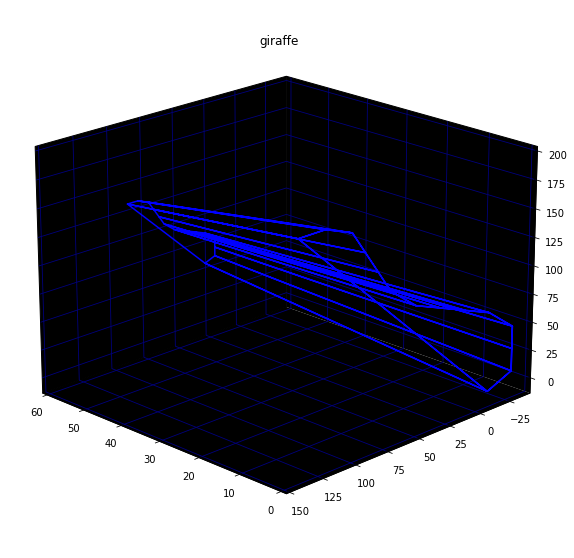

In [114]:
d = """
  dc.w -1,16,-3,15,-3,13,-3,11,-1,9,1,8,3,7,5,6,7,4,8,2,9,0,10,-2,12,-3,14,-3,-1,16,0
"""

l = [(int(x)*10) for x in ','.join([x for x in d.split() if ',' in x]).split(',')]
vertices = [(l[i],l[i+1]) for i in range(0,len(l)-1,2)]
x,y,z = create3DVertices(vertices)
makeFullGraph(x,y,z,"webs/" + "giraffe.png","giraffe",1)















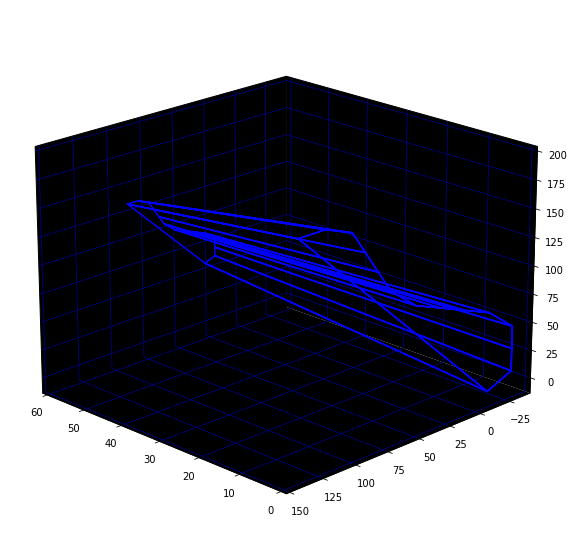

In [63]:
d = """
  dc.w -1,16,-3,15,-3,13,-3,11,-1,9,1,8,3,7,5,6,7,4,8,2,9,0,10,-2,12,-3,14,-3,-1,16,0
"""

l = [(int(x)*10) for x in ','.join([x for x in d.split() if ',' in x]).split(',')]
vertices = [(l[i],l[i+1]) for i in range(0,len(l)-1,2)]
x,y,z = create3DVertices(vertices)
makeFullGraph(x,y,z,"webs/" + "giraffe.png")

